# Data Mining Clinal Healthcare Data to Predict Heart Failure

### Context

Cardiovascular diseases (CVD's) are the number one cause of death globally taking an estimated 17.9 million lives each year. Four out of five CVD deaths can be attributed to heart attacks and strokes, with one-third of these deaths occur prematurely in individuals under 70 years old. Given that heart failure is known to correlate with common clinical features collected during routine check-ups, machine learning offers a cost-efficient way to screen individuals do determine if their relative risk level.

Authors:
- Gary Bair
- George Garcia
- Luis Perez

### Package Requirements

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
import graphviz
import os
import random
import imblearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import multiprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_curve, roc_auc_score, confusion_matrix
from scipy.stats import loguniform

# Data Importing and Pre-processing

## Dataset Description

This dataset was created by combining datasets already available independently but not previously combined in the UCI Machine Learning Repository. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

Total: 1190 observations <br />
Duplicated: 272 observations <br />

Final dataset: 918 observations <br />

Origin: Kaggle <br />
File Type: CSV <br />
File Size: 35.1 kB <br />
Modeling Problem: Classification <br />
Missing Values: No <br />

The individual datasets used to construct the dataset used in this analysis can be referenced using the index of heart disease datasets from UCI Machine Learning Repository which can be found at the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Attribute Information:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


### Read Dataset and Display Info, 

In [2]:
df= pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Display Columns

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dataframe Dimensions

In [5]:
df.shape

(918, 12)

### Missing Data

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We observe that there are no missing values in this dataset thus data imputation will not be required.

### Data Statistics

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We note that all values exist within plausible ranges. Resting BP can be zero in cases of severe hypertension and FastingBS/HeartDisease are binary variables thus are admissible at this stage of analysis.

### Data Transformation

In [8]:
cat_variables = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
num_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [9]:
cat_dummies = pd.get_dummies(df[cat_variables])

In [10]:
def mm_normalize(df,col_list):
    temp_df = pd.DataFrame()
    for col in col_list:
        temp_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return temp_df

In [11]:
num_normed = mm_normalize(df, num_variables)

In [12]:
processed_df = pd.concat([num_normed, cat_dummies],axis = 1)

In [13]:
processed_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


# Data Analysis and Visualization

## Identifying Variable Types

### Categorical Features:
- Sex: sex of the patient [M: Male, F: Female] <br />
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br />
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br />
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy] <br />
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br />
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal] <br />

### Numerical Features:
- Age: age of the patient [years]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]


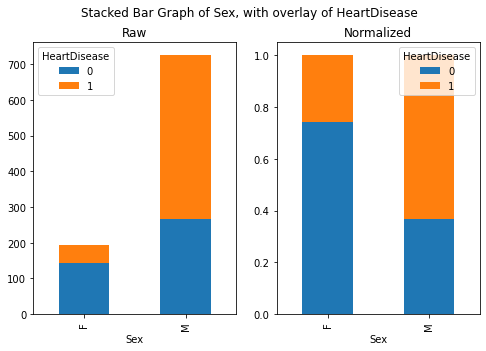

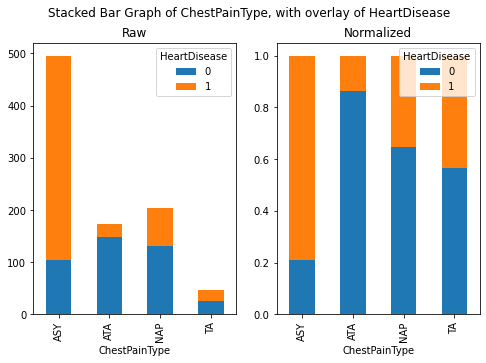

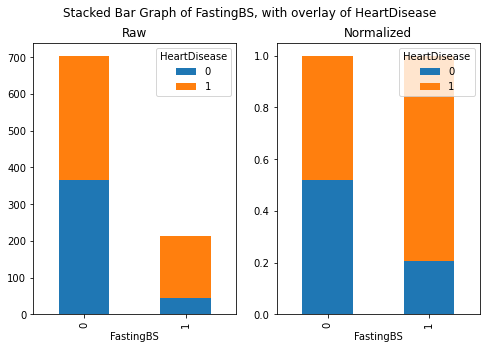

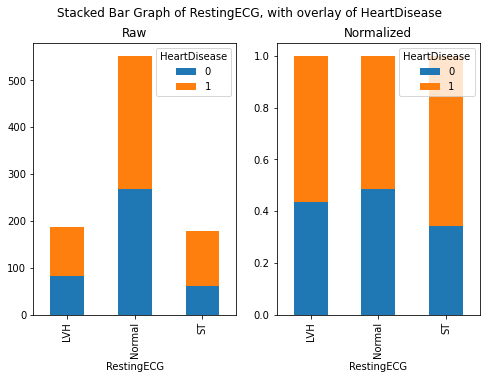

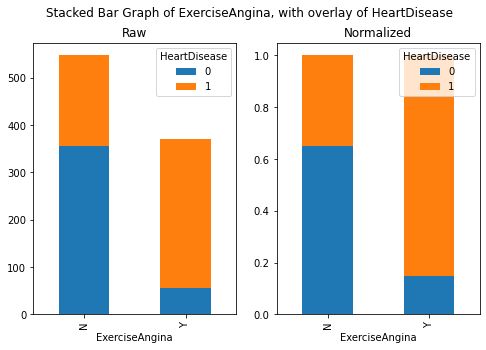

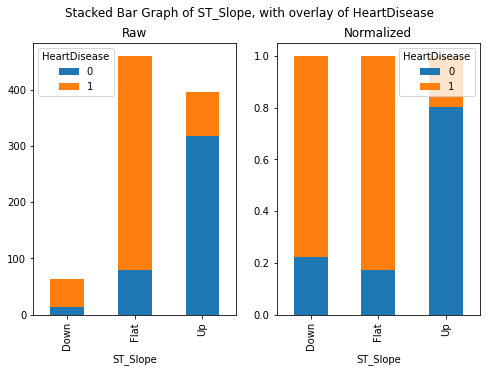

In [14]:
for col in cat_variables:
    crosstab = pd.crosstab(df[col], df['HeartDisease'])
    crosstab_norm = crosstab.div(crosstab.sum(1), axis = 0)
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Stacked Bar Graph of {}, with overlay of HeartDisease'.format(col))
    ax1.set_title('Raw')
    crosstab.plot(kind = 'bar', ax = ax1, stacked = True, figsize = (8,5), sort_columns = True)
    ax2.set_title('Normalized')
    crosstab_norm.plot(kind = 'bar', ax = ax2, stacked = True, figsize = (8,5), sort_columns = True)

In [15]:
print('HeartDisease split')
print(df.HeartDisease.value_counts(normalize = True))
print('\n')
for col in cat_variables:
    ct_1 = pd.crosstab(df['HeartDisease'], df[col])
    ct_2 = pd.crosstab(df['HeartDisease'], 
                       df[col],
                       normalize = 'columns')
    print('{} Values'.format(col))
    print(ct_1)
    print('\n')
    print('{} Percentages'.format(col))
    print(ct_2)
    print('\n')

HeartDisease split
1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


Sex Values
Sex             F    M
HeartDisease          
0             143  267
1              50  458


Sex Percentages
Sex                  F         M
HeartDisease                    
0             0.740933  0.368276
1             0.259067  0.631724


ChestPainType Values
ChestPainType  ASY  ATA  NAP  TA
HeartDisease                    
0              104  149  131  26
1              392   24   72  20


ChestPainType Percentages
ChestPainType       ASY       ATA      NAP        TA
HeartDisease                                        
0              0.209677  0.861272  0.64532  0.565217
1              0.790323  0.138728  0.35468  0.434783


FastingBS Values
FastingBS       0    1
HeartDisease          
0             366   44
1             338  170


FastingBS Percentages
FastingBS            0         1
HeartDisease                    
0             0.519886  0.205607
1             0.480114  0.794393



<ipython-input-16-4b89e19b704e>:13: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)


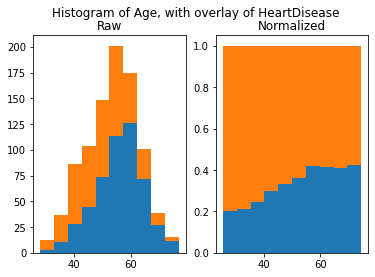

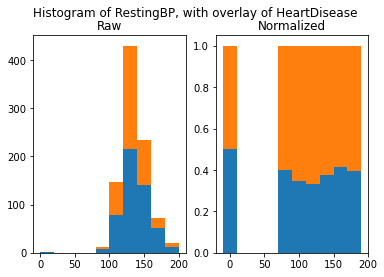

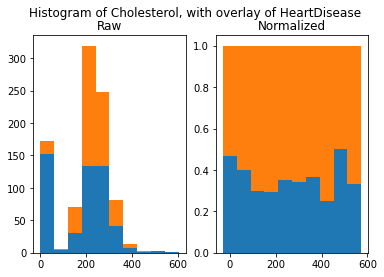

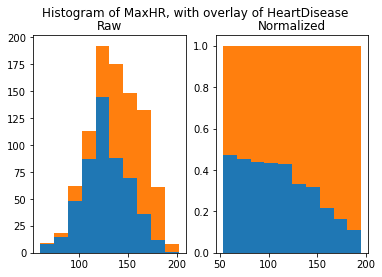

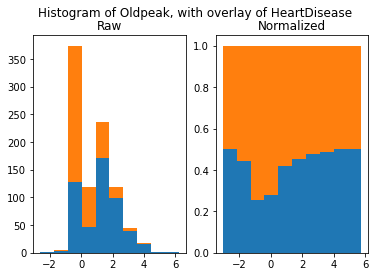

In [16]:
for col in num_variables:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Histogram of {}, with overlay of HeartDisease'.format(col))
    ax1.set_title('Raw')
    ax2.set_title('Normalized')

    y = df[df.HeartDisease == 1][col]
    n = df[df.HeartDisease == 0][col]
    
    n, bins, patches = ax1.hist([y, n], bins = 10, stacked = True)
    n_table = np.column_stack((n[0], n[1]))
    n_sum = n_table.sum(axis=1)[:, None]
    n_norm = np.true_divide(n_table, n_sum)
    ourbins = np.column_stack((bins[0:10], bins[1:11]))
    
    ax2.bar(x = ourbins[:,0], 
       height = n_norm[:,1], 
       width = ourbins[:, 1] - ourbins[:, 0])
    ax2.bar(x = ourbins[:,0], 
       height = n_norm[:,1], 
       width = ourbins[:, 1] - ourbins[:, 0], 
       bottom = n_norm[:,0])

In [17]:
df[num_variables].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [18]:
df[num_variables].skew()

Age           -0.195933
RestingBP      0.179839
Cholesterol   -0.610086
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64

In [19]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


## Bivariate Analysis

In [20]:
corr = df[num_variables].corr()
corr

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


<AxesSubplot:>

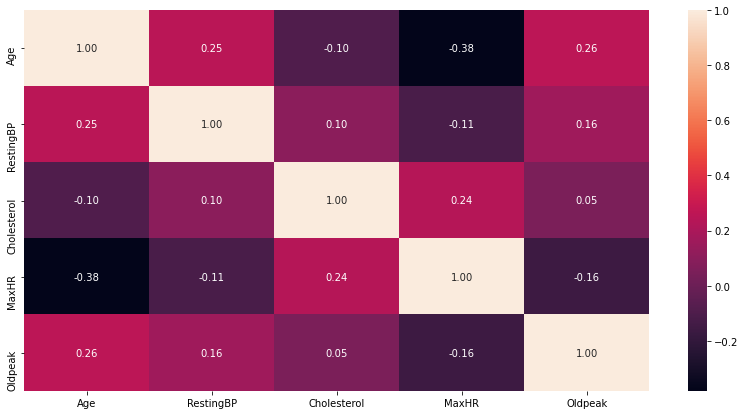

In [21]:
plt.figure(figsize = (14,7))
sns.heatmap(corr, 
            annot = True , 
            fmt = '.2f')

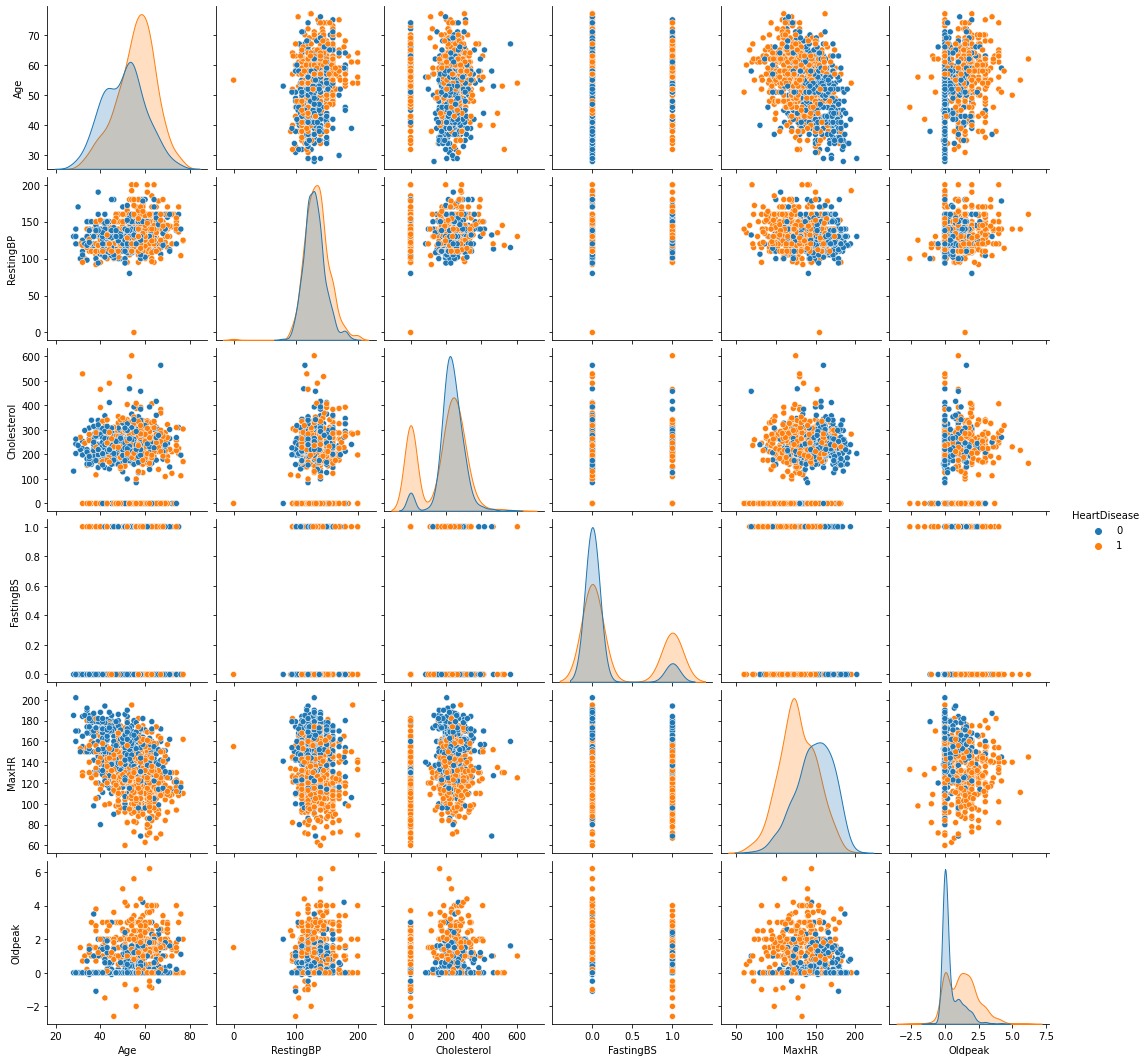

In [22]:
sns.pairplot(df, hue = 'HeartDisease')

# Data Analytics

### Data Partitioning and Balancing

In [23]:
y = df['HeartDisease']
y_names = ['Heart Disease','No Heart Disease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [24]:
X = processed_df
X_names =['Age',
          'RestingBP',
          'Cholesterol',
          'MaxHR',
          'Oldpeak',
          'FastingBS',
          'Female', 'Male',
          'ChestPainType_Asymptomatic','ChestPainType_ATA','ChestPainType_TA', 'ChestPainType_NAP',
          'RestingECG_LVH','RestingECG_Normal', 'RestingECG_ST',
          'ExerciseAngina_N','ExerciseAngina_Y',
          'ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up']
X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

### Resampling

In [26]:
print('Target Feature Counts')
print(y_train.value_counts())

print('Target Feature Distribution')
print(y_train.value_counts(normalize = True))

Target Feature Counts
1    345
0    297
Name: HeartDisease, dtype: int64
Target Feature Distribution
1    0.537383
0    0.462617
Name: HeartDisease, dtype: float64


The default distribution of HeartDisease is observed to be roughly a 54%/46% split.

In [27]:
over_sampler = SMOTE(k_neighbors=2)
X_train_reb, y_train_reb = over_sampler.fit_resample(X_train, y_train)

print('Target Feature Distribution after Rebalancing')
print(y_train_reb.value_counts(normalize = True))

Target Feature Distribution after Rebalancing
0    0.5
1    0.5
Name: HeartDisease, dtype: float64


The training dataset now has a 50%/50% split. The test dataset is unmodified and will remain as such. Due to how SMOTE operates, we must recast y_train_reb to NumPy array.

## Logistic Regression

### Baseline Model with Scikit-Learn Default Values

Hyperparameters of Interest:
1. Norm Penalty(penalty) - l2
2. Inverse of Regularization Strength(C) - 1.0

In [28]:
lr_baseline = LogisticRegression(random_state=0)

lr_baseline.fit(X_train_reb, y_train_reb)

lr_baseline_y_train = lr_baseline.predict(X_train_reb)
lr_baseline_y_test = lr_baseline.predict(X_test)

### Baseline Model Evaluation

In [29]:
ct_lr_train = pd.DataFrame()
ct_lr_train['Train_Actual'] = y_train_reb
ct_lr_train['LR_Baseline_Train'] = lr_baseline_y_train

lr_baseline_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                          ct_lr_train['LR_Baseline_Train'])
lr_baseline_confusion_train

LR_Baseline_Train,0,1
Train_Actual,,
0,301,44
1,39,306


In [30]:
ct_lr_test = pd.DataFrame()
ct_lr_test['Test_Actual'] = y_test
ct_lr_test['LR_Baseline_Test'] = lr_baseline_y_test

lr_baseline_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                ct_lr_test['LR_Baseline_Test'])
lr_baseline_confusion_test

LR_Baseline_Test,0,1
Test_Actual,,
0,86,27
1,19,144


In [31]:
data = [accuracy_score(y_train_reb, lr_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, lr_baseline_y_train),
        recall_score(y_train_reb, lr_baseline_y_train),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, lr_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_baseline_y_train)
       ]


test_names = ['Accuracy',
              'Precision',
              'Recall',
              'F1',
              'F2',
              'F0.5',
              'AUC ROC'
             ]

Training_Performance_Table = pd.DataFrame(data, 
                                          index = test_names, 
                                          columns = ['LR_Baseline'])

In [32]:
data = [accuracy_score(y_test, lr_baseline_y_test, normalize=True), 
        precision_score(y_test, lr_baseline_y_test),
        recall_score(y_test, lr_baseline_y_test),
        fbeta_score(y_test, lr_baseline_y_test, beta=1),
        fbeta_score(y_test, lr_baseline_y_test, beta=2),
        fbeta_score(y_test, lr_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, lr_baseline_y_test)
       ]


test_names = ['Accuracy',
              'Precision',
              'Recall',
              'F1',
              'F2',
              'F0.5',
              'AUC ROC'
             ]

Test_Performance_Table = pd.DataFrame(data, 
                                      index = test_names, 
                                      columns = ['LR_Baseline'])

In [33]:
Training_Performance_Table

,LR_Baseline
Accuracy,0.879710
Precision,0.874286
Recall,0.886957
F1,0.880576
F2,0.884393
F0.5,0.876791
AUC ROC,0.879710


In [34]:
Test_Performance_Table

,LR_Baseline
Accuracy,0.833333
Precision,0.842105
Recall,0.883436
F1,0.862275
F2,0.874848
F0.5,0.850059
AUC ROC,0.822249


## V1 Model using GridSearchCV

Hyperparameters of Interest:
1. Norm Penalty(penalty) - (none, l1, l2, elasticnet)
2. Inverse of Regularization Strength(C) - (0.001, 0.01, 0.1, 1, 10, 100)
3. Elastic-Net Mixing Parameter(l1_ratio) - (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1)
4. Random State - 0
5. Solver - SAGA

Notes: 
- Elastic-Net Mixing Parameter is only explored as it is a necessary sub-parameter used in Elastic Net regularization.
- SAGA solver is specified as it supports all norm penalties supported in this library

In [35]:
lr_space = dict()
lr_space['C'] = [0.001,0.01,0.1,1,10,100]
lr_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
lr_space['l1_ratio'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [36]:
lr = LogisticRegression(random_state=0, solver = 'saga')
lr_gs = GridSearchCV(lr, 
                     lr_space, 
                     scoring = 'accuracy', 
                     n_jobs = -1)
lr_gs.fit(X_train_reb, y_train_reb)
print('Best Score: %s' % lr_gs.best_score_)
print('Best Hyperparameters: %s' % lr_gs.best_params_)

Best Score: 0.881159420289855
Best Hyperparameters: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'elasticnet'}


In [37]:
lr_v1_y_train = lr_gs.predict(X_train_reb)
lr_v1_y_test = lr_gs.predict(X_test)

### V1 Model Evaluation

In [38]:
ct_lr_train['LR_V1_Train'] = lr_v1_y_train

lr_v1_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                    ct_lr_train['LR_V1_Train'])
lr_v1_confusion_train

LR_V1_Train,0,1
Train_Actual,,
0,299,46
1,36,309


In [39]:
ct_lr_test['LR_V1_Test'] = lr_v1_y_test

lr_v1_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                   ct_lr_test['LR_V1_Test'])
lr_v1_confusion_test

LR_V1_Test,0,1
Test_Actual,,
0,88,25
1,23,140


In [40]:
data = [accuracy_score(y_train_reb, lr_v1_y_train, normalize=True), 
        precision_score(y_train_reb, lr_v1_y_train),
        recall_score(y_train_reb, lr_v1_y_train),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=1),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=2),
        fbeta_score(y_train_reb, lr_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_v1_y_train)
       ]

Training_Performance_Table['LR_V1'] = data

In [41]:
data = [accuracy_score(y_test, lr_v1_y_test, normalize=True), 
        precision_score(y_test, lr_v1_y_test),
        recall_score(y_test, lr_v1_y_test),
        fbeta_score(y_test, lr_v1_y_test, beta=1),
        fbeta_score(y_test, lr_v1_y_test, beta=2),
        fbeta_score(y_test, lr_v1_y_test, beta=0.5),
        roc_auc_score(y_test, lr_v1_y_test)
       ]

Test_Performance_Table['LR_V1'] = data

In [42]:
Training_Performance_Table

,LR_Baseline,LR_V1
Accuracy,0.879710,0.881159
Precision,0.874286,0.870423
Recall,0.886957,0.895652
F1,0.880576,0.882857
F2,0.884393,0.890490
F0.5,0.876791,0.875354
AUC ROC,0.879710,0.881159


In [43]:
Test_Performance_Table

,LR_Baseline,LR_V1
Accuracy,0.833333,0.826087
Precision,0.842105,0.848485
Recall,0.883436,0.858896
F1,0.862275,0.853659
F2,0.874848,0.856793
F0.5,0.850059,0.850547
AUC ROC,0.822249,0.818828


Given that the increase in training set accuracy resulted in a decrease in the test set accuracy, it is reasonable to conclude that this is a sign of overfitting and further efforts to tune hyperparamters are unlikely to produce a notable increase in performance.

## V2 Model using Recursive Feature Elimination

For our final model, we aim to increase the models perfomance through dimensionality reduction. Given that the initial model uses the l2 penalty which allows coefficents to go to zero, we can use it as a starting point to determine which variables are least useful to our model.

In [44]:
lr_baseline.coef_

array([[ 0.19130932,  0.64483131, -1.12171882, -0.76892951,  1.23366823,
         1.28612905, -0.66240724,  0.66267831,  1.08191669, -0.866476  ,
        -0.41393327,  0.19876365,  0.63527579,  0.30087442,  0.07122167,
        -0.53628093,  0.536552  ,  0.24467393,  1.21942689, -1.46382975]])

In [45]:
X_train_reb.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [198]:
lr_v2_train = X_train_reb[['Age',
                           'RestingBP', 
                           'Cholesterol', 
                           'MaxHR', 
                           'Oldpeak', 
                           'FastingBS',
                           'Sex_F', 
                           'ChestPainType_ASY', 
                           'ExerciseAngina_N', 
                           'ST_Slope_Flat', 'ST_Slope_Up']]

In [199]:
lr_v2_test = X_test[['Age',
                     'RestingBP', 
                     'Cholesterol', 
                     'MaxHR', 
                     'Oldpeak', 
                     'FastingBS',
                     'Sex_F', 
                     'ChestPainType_ASY', 
                     'ExerciseAngina_N', 
                     'ST_Slope_Flat', 'ST_Slope_Up']]

In [200]:
lr_v2 = LogisticRegression(random_state=0)
lr_v2.fit(lr_v2_train, y_train_reb)

lr_v2_y_train = lr_v2.predict(lr_v2_train)
lr_v2_y_test = lr_v2.predict(lr_v2_test)

In [201]:
lr_v2.coef_

array([[ 0.39954486,  0.65325402, -1.05336451, -0.59583528,  1.40599321,
         1.27311428, -1.26998041,  1.54819247, -0.97033239,  1.029338  ,
        -1.70893372]])

### V2 Model Evaluation

In [202]:
ct_lr_train['LR_V2_Train'] = lr_v2_y_train

lr_v2_confusion_train = pd.crosstab(ct_lr_train['Train_Actual'],
                                    ct_lr_train['LR_V2_Train'])
lr_v2_confusion_train

LR_V2_Train,0,1
Train_Actual,,
0,298,47
1,41,304


In [203]:
ct_lr_test['LR_V2_Test'] = lr_v2_y_test

lr_v2_confusion_test = pd.crosstab(ct_lr_test['Test_Actual'],
                                   ct_lr_test['LR_V2_Test'])
lr_v2_confusion_test

LR_V2_Test,0,1
Test_Actual,,
0,92,21
1,21,142


In [204]:
data = [accuracy_score(y_train_reb, lr_v2_y_train, normalize=True), 
        precision_score(y_train_reb, lr_v2_y_train),
        recall_score(y_train_reb, lr_v2_y_train),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=1),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=2),
        fbeta_score(y_train_reb, lr_v2_y_train, beta=0.5),
        roc_auc_score(y_train_reb, lr_v2_y_train)
       ]

Training_Performance_Table['LR_V2'] = data

In [208]:
data = [accuracy_score(y_test, lr_v2_y_test, normalize=True), 
        precision_score(y_test, lr_v2_y_test),
        recall_score(y_test, lr_v2_y_test),
        fbeta_score(y_test, lr_v2_y_test, beta=1),
        fbeta_score(y_test, lr_v2_y_test, beta=2),
        fbeta_score(y_test, lr_v2_y_test, beta=0.5),
        roc_auc_score(y_test, lr_v2_y_test)
       ]

Test_Performance_Table['LR_V2'] = data

In [206]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2
Accuracy,0.879710,0.881159,0.872464
Precision,0.874286,0.870423,0.866097
Recall,0.886957,0.895652,0.881159
F1,0.880576,0.882857,0.873563
F2,0.884393,0.890490,0.878105
F0.5,0.876791,0.875354,0.869068
AUC ROC,0.879710,0.881159,0.872464


In [207]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2
Accuracy,0.833333,0.826087,0.847826
Precision,0.842105,0.848485,0.871166
Recall,0.883436,0.858896,0.871166
F1,0.862275,0.853659,0.871166
F2,0.874848,0.856793,0.871166
F0.5,0.850059,0.850547,0.871166
AUC ROC,0.822249,0.818828,0.842662


Eliminating roughly have the predictors in the dataset yielded improvements in model accuracy on the test with little to no effect on the training set.

## CART Decision Tree

### Baseline Model with Scikit-Learn Default Values

Hyperparameters of Interest:
1. Impurity Measure(criterion) - Gini
2. Minimum Number of Samples Required to be at a Leaf Node(C) - 1

In [44]:
cart_baseline = DecisionTreeClassifier(random_state = 0)
cart_baseline.fit(X_train_reb, y_train_reb)

cart_baseline_y_train = cart_baseline.predict(X_train_reb)
cart_baseline_y_test = cart_baseline.predict(X_test)

[Text(617.9315878378378, 520.95, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 690\nvalue = [345, 345]\nclass = Heart Disease'),
 Text(339.7956081081081, 475.65000000000003, 'ChestPainType_Asymptomatic <= 0.5\ngini = 0.32\nsamples = 375\nvalue = [75, 300]\nclass = No Heart Disease'),
 Text(113.73648648648648, 430.35, 'Male <= 0.5\ngini = 0.483\nsamples = 120\nvalue = [49, 71]\nclass = No Heart Disease'),
 Text(50.270270270270274, 385.05, 'Oldpeak <= 0.301\ngini = 0.346\nsamples = 27\nvalue = [21, 6]\nclass = Heart Disease'),
 Text(30.16216216216216, 339.75, 'RestingBP <= 0.673\ngini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = No Heart Disease'),
 Text(20.10810810810811, 294.45, 'Cholesterol <= 0.468\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Heart Disease'),
 Text(10.054054054054054, 249.14999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Heart Disease'),
 Text(30.16216216216216, 249.14999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No Heart Diseas

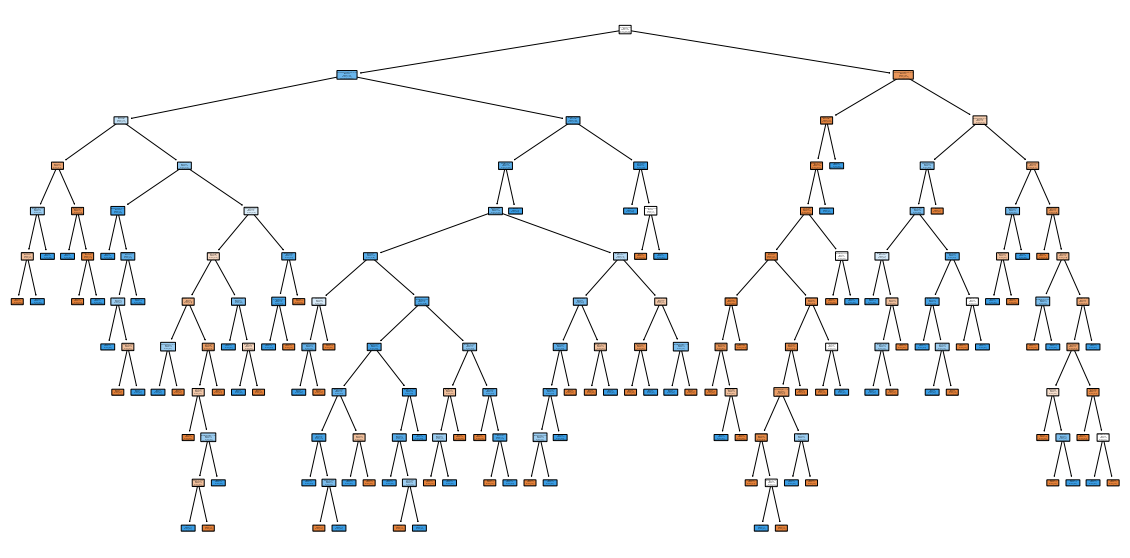

In [45]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_baseline, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

### Baseline Model Evaluation

In [46]:
ct_cart_train = pd.DataFrame()
ct_cart_train['Train_Actual'] = y_train_reb
ct_cart_train['CART_Baseline_Train'] = cart_baseline_y_train

cart_baseline_confusion_train = pd.crosstab(ct_cart_train['Train_Actual'],
                                          ct_cart_train['CART_Baseline_Train'])
cart_baseline_confusion_train

CART_Baseline_Train,0,1
Train_Actual,,
0,345,0
1,0,345


In [47]:
ct_cart_test = pd.DataFrame()
ct_cart_test['Test_Actual'] = y_test
ct_cart_test['CART_Baseline_Test'] = cart_baseline_y_test

cart_baseline_confusion_test = pd.crosstab(ct_cart_test['Test_Actual'],
                                           ct_cart_test['CART_Baseline_Test'])
cart_baseline_confusion_test

CART_Baseline_Test,0,1
Test_Actual,,
0,90,23
1,30,133


In [48]:
data = [accuracy_score(y_train_reb, cart_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, cart_baseline_y_train),
        recall_score(y_train_reb, cart_baseline_y_train),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, cart_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, cart_baseline_y_train)
       ]

Training_Performance_Table['CART_Baseline'] = data

In [49]:
data = [accuracy_score(y_test, cart_baseline_y_test, normalize=True), 
        precision_score(y_test, cart_baseline_y_test),
        recall_score(y_test, cart_baseline_y_test),
        fbeta_score(y_test, cart_baseline_y_test, beta=1),
        fbeta_score(y_test, cart_baseline_y_test, beta=2),
        fbeta_score(y_test, cart_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, cart_baseline_y_test)
       ]

Test_Performance_Table['CART_Baseline'] = data

In [50]:
Training_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline
Accuracy,0.868116,0.875362,1.0
Precision,0.858757,0.860724,1.0
Recall,0.881159,0.895652,1.0
F1,0.869814,0.877841,1.0
F2,0.876586,0.888442,1.0
F0.5,0.863146,0.867490,1.0
AUC ROC,0.868116,0.875362,1.0


In [51]:
Test_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline
Accuracy,0.833333,0.826087,0.807971
Precision,0.842105,0.844311,0.852564
Recall,0.883436,0.865031,0.815951
F1,0.862275,0.854545,0.833856
F2,0.874848,0.860806,0.823020
F0.5,0.850059,0.848375,0.844981
AUC ROC,0.822249,0.817471,0.806206


Inspection of the performance metrics of the baseline model indicates that, unsurprisingly, the model has significant overfitting. Minimizing this is the goal of the following model.

### V1 Model

Hyperparameters of Interest:
1. Minimum Number of Samples Required to be at a Leaf Node(C) - 10

Note: 
- We do not implement GridSearchCV in this model as it is computationally expensive and, theoretically, will not generalize well as GridSearchCV will produce the most complex model allowable by the input parameters. This defeats the purpose of GridSearchCV.

In [52]:
cart_v1 = DecisionTreeClassifier(random_state = 0, 
                                 criterion = 'gini', 
                                 min_samples_leaf = 10)

cart_v1.fit(X_train_reb, y_train_reb)

cart_v1_y_train = cart_v1.predict(X_train_reb)
cart_v1_y_test = cart_v1.predict(X_test)

[Text(578.6666666666667, 516.4200000000001, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 690\nvalue = [345, 345]\nclass = Heart Disease'),
 Text(316.8888888888889, 462.06000000000006, 'ChestPainType_Asymptomatic <= 0.5\ngini = 0.32\nsamples = 375\nvalue = [75, 300]\nclass = No Heart Disease'),
 Text(124.0, 407.70000000000005, 'Male <= 0.5\ngini = 0.483\nsamples = 120\nvalue = [49, 71]\nclass = No Heart Disease'),
 Text(55.111111111111114, 353.34000000000003, 'Oldpeak <= 0.441\ngini = 0.346\nsamples = 27\nvalue = [21, 6]\nclass = Heart Disease'),
 Text(27.555555555555557, 298.98, 'gini = 0.469\nsamples = 16\nvalue = [10, 6]\nclass = Heart Disease'),
 Text(82.66666666666667, 298.98, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Heart Disease'),
 Text(192.8888888888889, 353.34000000000003, 'MaxHR <= 0.489\ngini = 0.421\nsamples = 93\nvalue = [28, 65]\nclass = No Heart Disease'),
 Text(137.77777777777777, 298.98, 'ExerciseAngina_N <= 0.5\ngini = 0.108\nsamples = 35\nvalue = [2, 33]\ncl

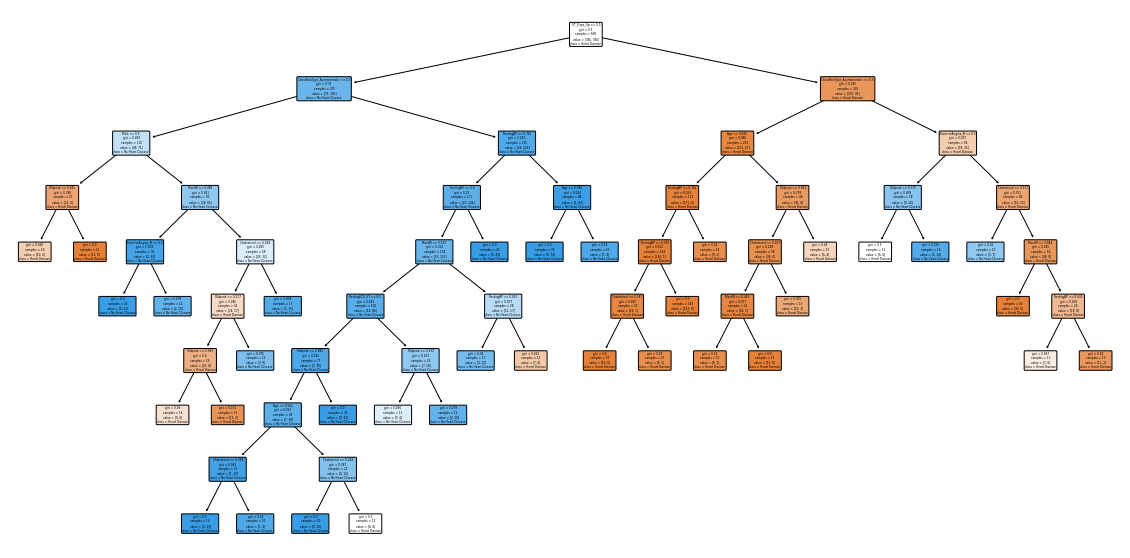

In [53]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_v1, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

### V1 Model Evaluation

In [54]:
ct_cart_train['CART_V1_Train'] = cart_v1_y_train

cart_v1_confusion_train = pd.crosstab(ct_cart_train['Train_Actual'],
                                      ct_cart_train['CART_V1_Train'])
cart_v1_confusion_train

CART_V1_Train,0,1
Train_Actual,,
0,320,25
1,48,297


In [55]:
ct_cart_test['CART_V1_Test'] = cart_v1_y_test

cart_v1_confusion_test = pd.crosstab(ct_cart_test['Test_Actual'],
                                     ct_cart_test['CART_V1_Test'])
cart_v1_confusion_test

CART_V1_Test,0,1
Test_Actual,,
0,94,19
1,34,129


In [56]:
data = [accuracy_score(y_train_reb, cart_v1_y_train, normalize=True), 
        precision_score(y_train_reb, cart_v1_y_train),
        recall_score(y_train_reb, cart_v1_y_train),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=1),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=2),
        fbeta_score(y_train_reb, cart_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, cart_v1_y_train)
       ]

Training_Performance_Table['CART_V1'] = data

In [57]:
data = [accuracy_score(y_test, cart_v1_y_test, normalize=True), 
        precision_score(y_test, cart_v1_y_test),
        recall_score(y_test, cart_v1_y_test),
        fbeta_score(y_test, cart_v1_y_test, beta=1),
        fbeta_score(y_test, cart_v1_y_test, beta=2),
        fbeta_score(y_test, cart_v1_y_test, beta=0.5),
        roc_auc_score(y_test, cart_v1_y_test)
       ]

Test_Performance_Table['CART_V1'] = data

In [58]:
Training_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline,CART_V1
Accuracy,0.868116,0.875362,1.0,0.894203
Precision,0.858757,0.860724,1.0,0.922360
Recall,0.881159,0.895652,1.0,0.860870
F1,0.869814,0.877841,1.0,0.890555
F2,0.876586,0.888442,1.0,0.872503
F0.5,0.863146,0.867490,1.0,0.909369
AUC ROC,0.868116,0.875362,1.0,0.894203


In [59]:
Test_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline,CART_V1
Accuracy,0.833333,0.826087,0.807971,0.807971
Precision,0.842105,0.844311,0.852564,0.871622
Recall,0.883436,0.865031,0.815951,0.791411
F1,0.862275,0.854545,0.833856,0.829582
F2,0.874848,0.860806,0.823020,0.806250
F0.5,0.850059,0.848375,0.844981,0.854305
AUC ROC,0.822249,0.817471,0.806206,0.811635


Inspecting the performance metrics indicates the effort to reduce overfitting was successful and there is likely further room to improve the model.

## XGBoost

### Baseline Model with Scikit-Learn Default Values

Hyperparameters of Interest:
1. ###
2. ###

In [60]:
xgb_baseline = xgb.XGBClassifier(random_state = 0, use_label_encoder = False)
xgb_baseline.fit(X_train_reb, y_train_reb)

xgb_baseline_y_train = xgb_baseline.predict(X_train_reb)
xgb_baseline_y_test = xgb_baseline.predict(X_test)

[19:58:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Baseline Model Evaluation

In [61]:
ct_xgb_train = pd.DataFrame()
ct_xgb_train['Train_Actual'] = y_train_reb
ct_xgb_train['XGB_Baseline_Train'] = xgb_baseline_y_train

xgb_baseline_confusion_train = pd.crosstab(ct_xgb_train['Train_Actual'],
                                           ct_xgb_train['XGB_Baseline_Train'])
xgb_baseline_confusion_train

XGB_Baseline_Train,0,1
Train_Actual,,
0,345,0
1,0,345


In [62]:
ct_xgb_test = pd.DataFrame()
ct_xgb_test['Test_Actual'] = y_test
ct_xgb_test['XGB_Baseline_Test'] = xgb_baseline_y_test

xgb_baseline_confusion_test = pd.crosstab(ct_xgb_test['Test_Actual'],
                                          ct_xgb_test['XGB_Baseline_Test'])
xgb_baseline_confusion_test

XGB_Baseline_Test,0,1
Test_Actual,,
0,91,22
1,19,144


In [63]:
data = [accuracy_score(y_train_reb, xgb_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, xgb_baseline_y_train),
        recall_score(y_train_reb, xgb_baseline_y_train),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, xgb_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, xgb_baseline_y_train)
       ]

Training_Performance_Table['XGB_Baseline'] = data

In [64]:
data = [accuracy_score(y_test, xgb_baseline_y_test, normalize=True), 
        precision_score(y_test, xgb_baseline_y_test),
        recall_score(y_test, xgb_baseline_y_test),
        fbeta_score(y_test, xgb_baseline_y_test, beta=1),
        fbeta_score(y_test, xgb_baseline_y_test, beta=2),
        fbeta_score(y_test, xgb_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, xgb_baseline_y_test)
       ]

Test_Performance_Table['XGB_Baseline'] = data

In [65]:
Training_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline,CART_V1,XGB_Baseline
Accuracy,0.868116,0.875362,1.0,0.894203,1.0
Precision,0.858757,0.860724,1.0,0.922360,1.0
Recall,0.881159,0.895652,1.0,0.860870,1.0
F1,0.869814,0.877841,1.0,0.890555,1.0
F2,0.876586,0.888442,1.0,0.872503,1.0
F0.5,0.863146,0.867490,1.0,0.909369,1.0
AUC ROC,0.868116,0.875362,1.0,0.894203,1.0


In [66]:
Test_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline,CART_V1,XGB_Baseline
Accuracy,0.833333,0.826087,0.807971,0.807971,0.851449
Precision,0.842105,0.844311,0.852564,0.871622,0.867470
Recall,0.883436,0.865031,0.815951,0.791411,0.883436
F1,0.862275,0.854545,0.833856,0.829582,0.875380
F2,0.874848,0.860806,0.823020,0.806250,0.880196
F0.5,0.850059,0.848375,0.844981,0.854305,0.870617
AUC ROC,0.822249,0.817471,0.806206,0.811635,0.844373


### V1 Model with GridSearchCV

Hyperparameters of Interest:
1. ###
2. ###

In [67]:
xgb_space = dict()
xgb_space['max_depth'] = [2, 4, 6]
xgb_space['n_estimators'] = [50, 100, 200]

In [68]:
xgb_v1 = xgb.XGBClassifier(random_state = 0, 
                           use_label_encoder = False,
                           n_jobs=multiprocessing.cpu_count() // 2)

xgb_gs = GridSearchCV(xgb_v1,
                      xgb_space, 
                      verbose=1,
                      n_jobs=2)

xgb_gs.fit(X_train_reb, y_train_reb)

xgb_v1_y_train = xgb_gs.predict(X_train_reb)
xgb_v1_y_test = xgb_gs.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[19:58:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### V1 Model Evaluation

In [69]:
ct_xgb_train['XGB_V1_Train'] = xgb_v1_y_train

xgb_v1_confusion_train = pd.crosstab(ct_xgb_train['Train_Actual'],
                                      ct_xgb_train['XGB_V1_Train'])
xgb_v1_confusion_train

XGB_V1_Train,0,1
Train_Actual,,
0,316,29
1,23,322


In [70]:
ct_xgb_test['XGB_V1_Test'] = xgb_v1_y_test

xgb_v1_confusion_test = pd.crosstab(ct_xgb_test['Test_Actual'],
                                    ct_xgb_test['XGB_V1_Test'])
xgb_v1_confusion_test

XGB_V1_Test,0,1
Test_Actual,,
0,90,23
1,19,144


In [71]:
data = [accuracy_score(y_train_reb, xgb_v1_y_train, normalize=True), 
        precision_score(y_train_reb, xgb_v1_y_train),
        recall_score(y_train_reb, xgb_v1_y_train),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=1),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=2),
        fbeta_score(y_train_reb, xgb_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, xgb_v1_y_train)
       ]

Training_Performance_Table['XGB_V1'] = data

In [72]:
data = [accuracy_score(y_test, xgb_v1_y_test, normalize=True), 
        precision_score(y_test, xgb_v1_y_test),
        recall_score(y_test, xgb_v1_y_test),
        fbeta_score(y_test, xgb_v1_y_test, beta=1),
        fbeta_score(y_test, xgb_v1_y_test, beta=2),
        fbeta_score(y_test, xgb_v1_y_test, beta=0.5),
        roc_auc_score(y_test, xgb_v1_y_test)
       ]

Test_Performance_Table['XGB_V1'] = data

In [73]:
Training_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline,CART_V1,XGB_Baseline,XGB_V1
Accuracy,0.868116,0.875362,1.0,0.894203,1.0,0.924638
Precision,0.858757,0.860724,1.0,0.922360,1.0,0.917379
Recall,0.881159,0.895652,1.0,0.860870,1.0,0.933333
F1,0.869814,0.877841,1.0,0.890555,1.0,0.925287
F2,0.876586,0.888442,1.0,0.872503,1.0,0.930098
F0.5,0.863146,0.867490,1.0,0.909369,1.0,0.920526
AUC ROC,0.868116,0.875362,1.0,0.894203,1.0,0.924638


In [74]:
Test_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline,CART_V1,XGB_Baseline,XGB_V1
Accuracy,0.833333,0.826087,0.807971,0.807971,0.851449,0.847826
Precision,0.842105,0.844311,0.852564,0.871622,0.867470,0.862275
Recall,0.883436,0.865031,0.815951,0.791411,0.883436,0.883436
F1,0.862275,0.854545,0.833856,0.829582,0.875380,0.872727
F2,0.874848,0.860806,0.823020,0.806250,0.880196,0.879121
F0.5,0.850059,0.848375,0.844981,0.854305,0.870617,0.866426
AUC ROC,0.822249,0.817471,0.806206,0.811635,0.844373,0.839948


Inspecting the performance metrics indicates the effort to reduce overfitting was successful and there is likely further room to improve the model.

## Neural Nets

### Baseline Model with Scikit-Learn Default Values

Hyperparameters of Interest:
1. ###
2. ###

In [217]:
nn_baseline = MLPClassifier(random_state = 0,
                            max_iter=1000)
nn_baseline.fit(X_train_reb, y_train_reb)

nn_baseline_y_train = nn_baseline.predict(X_train_reb)
nn_baseline_y_test = nn_baseline.predict(X_test)

C:\Users\garyb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Baseline Model Evaluation

In [218]:
ct_nn_train = pd.DataFrame()
ct_nn_train['Train_Actual'] = y_train_reb
ct_nn_train['NN_Baseline_Train'] = nn_baseline_y_train

nn_baseline_confusion_train = pd.crosstab(ct_nn_train['Train_Actual'],
                                           ct_nn_train['NN_Baseline_Train'])
nn_baseline_confusion_train

NN_Baseline_Train,0,1
Train_Actual,,
0,322,23
1,12,333


In [219]:
ct_nn_test = pd.DataFrame()
ct_nn_test['Test_Actual'] = y_test
ct_nn_test['NN_Baseline_Test'] = nn_baseline_y_test

nn_baseline_confusion_test = pd.crosstab(ct_nn_test['Test_Actual'],
                                          ct_nn_test['NN_Baseline_Test'])
nn_baseline_confusion_test

NN_Baseline_Test,0,1
Test_Actual,,
0,94,19
1,22,141


In [220]:
data = [accuracy_score(y_train_reb, nn_baseline_y_train, normalize=True), 
        precision_score(y_train_reb, nn_baseline_y_train),
        recall_score(y_train_reb, nn_baseline_y_train),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=1),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=2),
        fbeta_score(y_train_reb, nn_baseline_y_train, beta=0.5),
        roc_auc_score(y_train_reb, nn_baseline_y_train)
       ]

Training_Performance_Table['NN_Baseline'] = data

In [221]:
data = [accuracy_score(y_test, nn_baseline_y_test, normalize=True), 
        precision_score(y_test, nn_baseline_y_test),
        recall_score(y_test, nn_baseline_y_test),
        fbeta_score(y_test, nn_baseline_y_test, beta=1),
        fbeta_score(y_test, nn_baseline_y_test, beta=2),
        fbeta_score(y_test, nn_baseline_y_test, beta=0.5),
        roc_auc_score(y_test, nn_baseline_y_test)
       ]

Test_Performance_Table['NN_Baseline'] = data

In [222]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,NN_Baseline
Accuracy,0.879710,0.881159,0.872464,0.949275
Precision,0.874286,0.870423,0.866097,0.935393
Recall,0.886957,0.895652,0.881159,0.965217
F1,0.880576,0.882857,0.873563,0.950071
F2,0.884393,0.890490,0.878105,0.959101
F0.5,0.876791,0.875354,0.869068,0.941210
AUC ROC,0.879710,0.881159,0.872464,0.949275


In [223]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,NN_Baseline
Accuracy,0.833333,0.826087,0.847826,0.851449
Precision,0.842105,0.848485,0.871166,0.881250
Recall,0.883436,0.858896,0.871166,0.865031
F1,0.862275,0.853659,0.871166,0.873065
F2,0.874848,0.856793,0.871166,0.868227
F0.5,0.850059,0.850547,0.871166,0.877958
AUC ROC,0.822249,0.818828,0.842662,0.848445


### V1 Model

Hyperparameters of Interest:
1. ###
2. ###

In [240]:
nn_v1 = MLPClassifier(hidden_layer_sizes=(8,8,8),
                      activation='logistic', 
                      solver='adam', 
                      max_iter=1000)

nn_v1.fit(X_train_reb, y_train_reb)

nn_v1_y_train = nn_v1.predict(X_train_reb)
nn_v1_y_test = nn_v1.predict(X_test)

### V1 Model Evaluation

In [241]:
ct_nn_train['NN_V1_Train'] = nn_v1_y_train

nn_v1_confusion_train = pd.crosstab(ct_nn_train['Train_Actual'],
                                    ct_nn_train['NN_V1_Train'])
nn_v1_confusion_train

NN_V1_Train,0,1
Train_Actual,,
0,295,50
1,28,317


In [242]:
ct_nn_test['XGB_V1_Test'] = nn_v1_y_test

nn_v1_confusion_test = pd.crosstab(ct_nn_test['Test_Actual'],
                                   ct_nn_test['XGB_V1_Test'])
nn_v1_confusion_test

XGB_V1_Test,0,1
Test_Actual,,
0,84,29
1,18,145


In [243]:
data = [accuracy_score(y_train_reb, nn_v1_y_train, normalize=True), 
        precision_score(y_train_reb, nn_v1_y_train),
        recall_score(y_train_reb, nn_v1_y_train),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=1),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=2),
        fbeta_score(y_train_reb, nn_v1_y_train, beta=0.5),
        roc_auc_score(y_train_reb, nn_v1_y_train)
       ]

Training_Performance_Table['NN_V1'] = data

In [244]:
data = [accuracy_score(y_test, nn_v1_y_test, normalize=True), 
        precision_score(y_test, nn_v1_y_test),
        recall_score(y_test, nn_v1_y_test),
        fbeta_score(y_test, nn_v1_y_test, beta=1),
        fbeta_score(y_test, nn_v1_y_test, beta=2),
        fbeta_score(y_test, nn_v1_y_test, beta=0.5),
        roc_auc_score(y_test, nn_v1_y_test)
       ]

Test_Performance_Table['NN_V1'] = data

In [245]:
Training_Performance_Table

,LR_Baseline,LR_V1,LR_V2,NN_Baseline,NN_V1
Accuracy,0.879710,0.881159,0.872464,0.949275,0.886957
Precision,0.874286,0.870423,0.866097,0.935393,0.863760
Recall,0.886957,0.895652,0.881159,0.965217,0.918841
F1,0.880576,0.882857,0.873563,0.950071,0.890449
F2,0.884393,0.890490,0.878105,0.959101,0.907270
F0.5,0.876791,0.875354,0.869068,0.941210,0.874242
AUC ROC,0.879710,0.881159,0.872464,0.949275,0.886957


In [246]:
Test_Performance_Table

,LR_Baseline,LR_V1,LR_V2,NN_Baseline,NN_V1
Accuracy,0.833333,0.826087,0.847826,0.851449,0.829710
Precision,0.842105,0.848485,0.871166,0.881250,0.833333
Recall,0.883436,0.858896,0.871166,0.865031,0.889571
F1,0.862275,0.853659,0.871166,0.873065,0.860534
F2,0.874848,0.856793,0.871166,0.868227,0.877724
F0.5,0.850059,0.850547,0.871166,0.877958,0.844005
AUC ROC,0.822249,0.818828,0.842662,0.848445,0.816467


Commentary

## Final Model Evaluation and Selection

In [90]:
Training_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline,CART_V1,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.868116,0.875362,1.0,0.894203,1.0,0.924638,0.900000,0.878261
Precision,0.858757,0.860724,1.0,0.922360,1.0,0.917379,0.875000,0.855586
Recall,0.881159,0.895652,1.0,0.860870,1.0,0.933333,0.933333,0.910145
F1,0.869814,0.877841,1.0,0.890555,1.0,0.925287,0.903226,0.882022
F2,0.876586,0.888442,1.0,0.872503,1.0,0.930098,0.921053,0.898683
F0.5,0.863146,0.867490,1.0,0.909369,1.0,0.920526,0.886076,0.865968
AUC ROC,0.868116,0.875362,1.0,0.894203,1.0,0.924638,0.900000,0.878261


In [91]:
Test_Performance_Table

,LR_Baseline,LR_V1,CART_Baseline,CART_V1,XGB_Baseline,XGB_V1,NN_Baseline,NN_V1
Accuracy,0.833333,0.826087,0.807971,0.807971,0.851449,0.847826,0.844203,0.836957
Precision,0.842105,0.844311,0.852564,0.871622,0.867470,0.862275,0.844828,0.843023
Recall,0.883436,0.865031,0.815951,0.791411,0.883436,0.883436,0.901840,0.889571
F1,0.862275,0.854545,0.833856,0.829582,0.875380,0.872727,0.872404,0.865672
F2,0.874848,0.860806,0.823020,0.806250,0.880196,0.879121,0.889831,0.879854
F0.5,0.850059,0.848375,0.844981,0.854305,0.870617,0.866426,0.855646,0.851939
AUC ROC,0.822249,0.817471,0.806206,0.811635,0.844373,0.839948,0.831451,0.825316


In [ ]:
y_pred_prob1 = lr_baseline.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = cart_v1.predict_proba(X_test)[:,1]
fpr_cart, tpr_cart, thresholds_cart = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = xgb_baseline.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_cart = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = nn_baseline.predict_proba(X_test)[:,1]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob4)


plt.figure(figsize = (10, 10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_lr, tpr_lr, label= 'Logistic Regression')
plt.plot(fpr_cart, tpr_cart, label= 'CART')
plt.plot(fpr_xgb, tpr_xgb, label= 'XGBoost')
plt.plot(fpr_nn, tpr_nn, label= 'Neural Net')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()